In [1]:
!pip install neurokit2

     |████████████████████████████████| 990 kB 1.4 MB/s eta 0:00:01     |█████████████████████████████▊  | 921 kB 1.4 MB/s eta 0:00:01


In [69]:
import neurokit2 as nk
import glob
import os 
from os.path import join, isdir, isfile
import pandas as pd 
import numpy as np
import torch
from torchvision import models, transforms
# from .ecg_eventrelated import ecg_eventrelated
# from .ecg_intervalrelated import ecg_intervalrelated

In [70]:
path = "/data/EEG_SIGNAL/DEAP/data_preprocessed_python"

In [71]:
data_eeg = glob.glob(join(path, "*.dat"))

In [72]:
data_eeg.sort()

In [73]:
data = 0 

In [74]:
eeg = nk.mne_data(data_eeg[0])
bads, info = nk.eeg_badchannels(eeg)

UnboundLocalError: local variable 'data' referenced before assignment

In [39]:
data_df = pd.DataFrame(data)

In [30]:
data_df[0][1]

'/data/EEG_SIGNAL/DEAP/data_preprocessed_python/s15.dat'

In [ ]:
eeg = nk.mne_data(data_df[0])
bads, info = nk.eeg_badchannels(eeg)

In [86]:
import mne

In [87]:
path = "/data/EEG_SIGNAL/DEAP/data_original"
data_list = glob.glob(join(path, "*.bdf"))

In [88]:
data_list.sort()

In [140]:
data_eeg = mne.io.read_raw_bdf(data_list[2])

Extracting EDF parameters from /data/EEG_SIGNAL/DEAP/data_original/s03.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


In [141]:
print(type(data_eeg))

<class 'mne.io.edf.edf.RawEDF'>


In [142]:
data_eeg

<RawEDF | s03.bdf, 48 x 1989120 (3885.0 s), ~50 kB, data not loaded>

In [143]:
data_eeg.crop(tmax=60)

<RawEDF | s03.bdf, 48 x 30721 (60.0 s), ~50 kB, data not loaded>

In [144]:
n_time_samps = data_eeg.n_times
time_secs = data_eeg.times
ch_names = data_eeg.ch_names
n_chan = len(ch_names)

print('the (cropped) sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}.'.format(', '.join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
print('bad channels:', data_eeg.info['bads'])  # chs marked "bad" during acquisition
print(data_eeg.info['sfreq'], 'Hz')            # sampling frequency
print(data_eeg.info['description'], '\n')      # miscellaneous acquisition info

print(data_eeg.info)

the (cropped) sample data object has 30721 time samples and 48 channels.
The last time sample is at 60.0 seconds.
The first few channel names are Fp1, AF3, F7.

bad channels: []
512.0 Hz
None 

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 47 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2010-07-01 13:42:41 UTC
 nchan: 48
 projs: []
 sfreq: 512.0 Hz
>


In [132]:
sampling_freq = data_eeg.info['sfreq']
start_stop_seconds = np.array([30, 50])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = data_eeg[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[0.00576207, 0.00575422, 0.00575879, ..., 0.00570972, 0.00570004,
        0.00569338]]), array([30.        , 30.00195312, 30.00390625, ..., 49.99414062,
       49.99609375, 49.99804688]))


In [133]:
import matplotlib.pyplot as plt

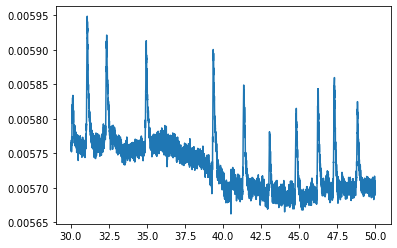

In [134]:
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y)

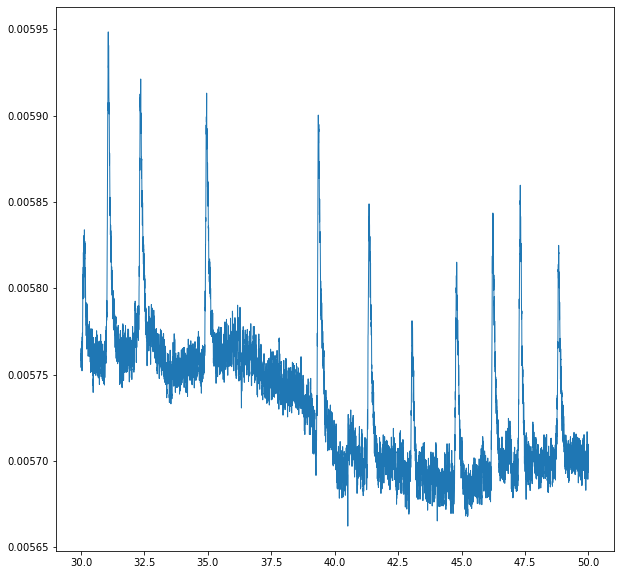

In [135]:
x = raw_selection[1]
y = raw_selection[0].T
plt.figure(figsize = (10, 10))
plt.plot(x, y, linewidth=1, markersize=30,)

In [136]:
ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'GSR1',
 'GSR2',
 'Erg1',
 'Erg2',
 'Resp',
 'Plet',
 'Temp',
 'Status']

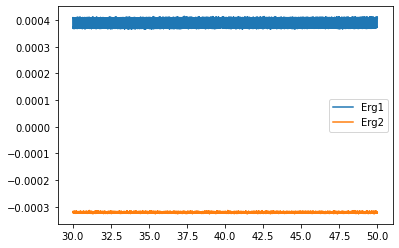

In [148]:
channel_names = ["Erg1", "Erg2"]
two_meg_chans = data_eeg[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y,)
plt.legend(lines, channel_names)

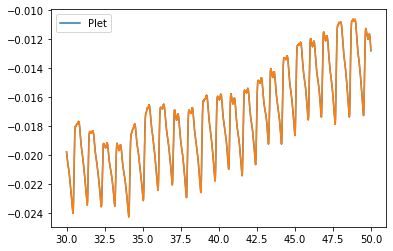

In [138]:
channel_names = ["Plet"]
two_meg_chans = data_eeg[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y,)
plt.legend(lines, channel_names)

In [139]:
eeg_channel_indices = mne.pick_types(data_eeg.info, meg=False, eeg=True)
eeg_data, times = data_eeg[eeg_channel_indices]
print(eeg_data.shape)

(47, 30721)


In [145]:
len(ch_names)

48

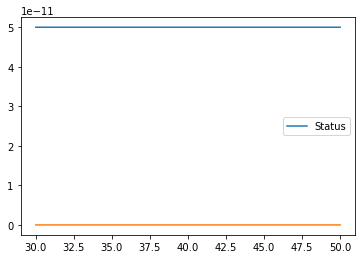

In [147]:
chn_name = ['Status']
visual = data_eeg[chn_name, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = visual[1]
y = visual[0].T + y_offset
lines = plt.plot(x, y,)
plt.legend(lines, chn_name)


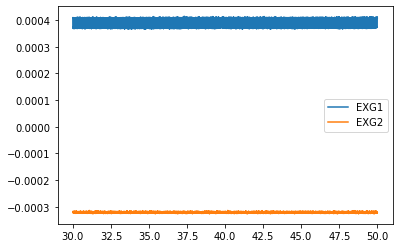

In [156]:
channel_names_2 = ["EXG1", "EXG2"]
four_meg_chans = data_eeg[channel_names_2, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y,)
plt.legend(lines, channel_names_2)

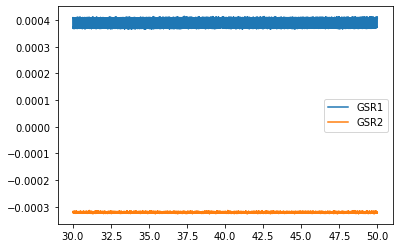

In [158]:
channel_names_3 = ["GSR1", "GSR2"]
four_meg_chans = data_eeg[channel_names_3, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y,)
plt.legend(lines, channel_names_3)

In [161]:
ch_names[0]

'Fp1'

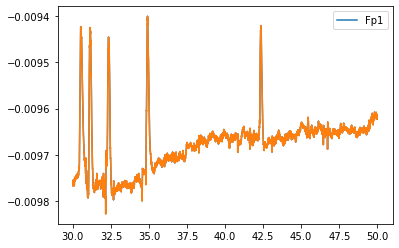

In [164]:
channel_names = ["Fp1"]
two_meg_chans = data_eeg[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y,)
plt.legend(lines, channel_names)

In [166]:
channel_names

['Fp1']

In [167]:
two_meg_chans

(array([[-0.00975687, -0.00975947, -0.00976365, ..., -0.00961515,
         -0.00961762, -0.00961819]]),
 array([30.        , 30.00195312, 30.00390625, ..., 49.99414062,
        49.99609375, 49.99804688]))

In [169]:
print(type(two_meg_chans))

<class 'tuple'>
